In [4]:
pip install pandasql

In [7]:

# Import
import pandas as pd
import pandasql as ps
from datetime import datetime
import seaborn
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

In [14]:
user_usage = pd.read_csv("/Users/elizavetasukach/Desktop/MachineLearning/lab2/user_usage.csv")
user_device = pd.read_csv("/Users/elizavetasukach/Desktop/MachineLearning/lab2/user_device.csv")
devices = pd.read_csv("/Users/elizavetasukach/Desktop/MachineLearning/lab2/android_devices.csv")
devices.rename(columns={"Retail Branding": "manufacturer"}, inplace=True)

In [4]:
user_usage.head()

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id
0,21.97,4.82,1557.33,22787
1,1710.08,136.88,7267.55,22788
2,1710.08,136.88,7267.55,22789
3,94.46,35.17,519.12,22790
4,71.59,79.26,1557.33,22792


In [5]:
user_device.head()

,use_id,user_id,platform,platform_version,device,use_type_id
0,22782,26980,ios,10.2,"iPhone7,2",2
1,22783,29628,android,6.0,Nexus 5,3
2,22784,28473,android,5.1,SM-G903F,1
3,22785,15200,ios,10.2,"iPhone7,2",3
4,22786,28239,android,6.0,ONE E1003,1


In [6]:
devices.head(10)

,manufacturer,Marketing Name,Device,Model
0,NaN,NaN,AD681H,Smartfren Andromax AD681H
1,NaN,NaN,FJL21,FJL21
2,NaN,NaN,T31,Panasonic T31
3,NaN,NaN,hws7721g,MediaPad 7 Youth 2
4,3Q,OC1020A,OC1020A,OC1020A
5,7Eleven,IN265,IN265,IN265
6,A.O.I. ELECTRONICS FACTORY,A.O.I.,TR10CS1_11,TR10CS1
7,AG Mobile,AG BOOST 2,BOOST2,E4010
8,AG Mobile,AG Flair,AG_Flair,Flair
9,AG Mobile,AG Go Tab Access 2,AG_Go_Tab_Access_2,AG_Go_Tab_Access_2


In [7]:
result = pd.merge(user_usage,
                 user_device[['use_id', 'platform', 'device']],
                 on='use_id')
result.head()

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device
0,21.97,4.82,1557.33,22787,android,GT-I9505
1,1710.08,136.88,7267.55,22788,android,SM-G930F
2,1710.08,136.88,7267.55,22789,android,SM-G930F
3,94.46,35.17,519.12,22790,android,D2303
4,71.59,79.26,1557.33,22792,android,SM-G361F


Выдать id пользователя и девайс, для которого outgoing_mins_per_month >1000

In [20]:
def example1_pandas(user_usage,user_device):
    return pd.merge(user_usage[user_usage.outgoing_mins_per_month >1000],
                 user_device[['use_id', 'device']],
                 on='use_id') [['use_id','device','outgoing_mins_per_month']]


In [21]:
example1_pandas(user_usage,user_device)

,use_id,device,outgoing_mins_per_month
0,22788,SM-G930F,1710.08
1,22789,SM-G930F,1710.08
2,22858,ONEPLUS A3003,1221.85


Выдать группировку по полю monthly_mb


In [23]:
def example2_pandas(user_usage):
    return user_usage.groupby(['monthly_mb']).size()

In [24]:
example2_pandas(user_usage)

monthly_mb
0.00        1
11.68       1
33.79       1
74.40       1
212.64      1
           ..
15573.33    9
16611.55    1
20764.45    2
25955.55    1
31146.67    1
Length: 83, dtype: int64

In [26]:
user_usage.shape

(240, 4)

In [39]:
def example1_pandasql(user_usage,user_device):
    simple_query = '''
        SELECT 
        user_usage.use_id,
        user_device.device,
        user_usage.outgoing_mins_per_month
        FROM user_usage JOIN user_device ON user_usage.use_id = user_device.use_id
        WHERE user_usage.outgoing_mins_per_month >1000
        '''
    return ps.sqldf(simple_query, locals())

In [40]:
example1_pandasql(user_usage,user_device)



,use_id,device,outgoing_mins_per_month
0,22788,SM-G930F,1710.08
1,22789,SM-G930F,1710.08
2,22858,ONEPLUS A3003,1221.85


In [25]:
def example2_pandasql(user_usage):
    simple_query = '''
        SELECT 
        monthly_mb,
        count(*)
        FROM user_usage 
        GROUP BY monthly_mb
        '''
    return ps.sqldf(simple_query, locals())


  #  user_usage.groupby(['monthly_mb']).size()

In [26]:
example2_pandasql(user_usage)

,monthly_mb,count(*)
0,0.00,1
1,11.68,1
2,33.79,1
3,74.40,1
4,212.64,1
...,...,...
78,15573.33,9
79,16611.55,1
80,20764.45,2
81,25955.55,1


In [41]:
import time

def count_mean_time(func, params, N =5):
    total_time = 0
    for i in range(N):
        time1 = time.time()
        if len(params) == 1:
            tmp_df = func(params[0])
        elif len(params) == 2:
            tmp_df = func(params[0], params[1])
        time2 = time.time()
        total_time += (time2 - time1)
    return total_time/N

In [42]:
ex1_times = []
for count in range(1000, 137000, 1000):
    pandasql_time = count_mean_time(example1_pandasql, [user_usage,user_device])
    pandas_time = count_mean_time(example1_pandas, [user_usage,user_device])
    ex1_times.append({'count': count, 'pandasql_time': pandasql_time, 'pandas_time': pandas_time})

In [43]:
ex1_times_df = pd.DataFrame(ex1_times)
ex1_times_df.columns = ['number of rows in daily_engagements', 'pandas time', 'pandasql time']
ex1_times_df = ex1_times_df.set_index('number of rows in daily_engagements')

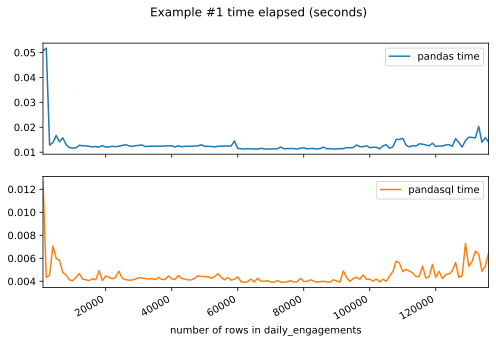

In [44]:
ax = ex1_times_df.plot(title = 'Example #1 time elapsed (seconds)', subplots = True)

In [47]:
ex2_times = []
for count in range(1000, 137000, 1000):
    pandasql_time = count_mean_time(example2_pandasql, [user_usage])
    pandas_time = count_mean_time(example2_pandas, [user_usage])
    ex2_times.append({'count': count, 'pandasql_time': pandasql_time, 'pandas_time': pandas_time})

In [49]:
ex2_times_df = pd.DataFrame(ex2_times)
ex2_times_df.columns = ['number of rows in daily_engagements', 'pandas time', 'pandasql time']
ex2_times_df = ex2_times_df.set_index('number of rows in daily_engagements')

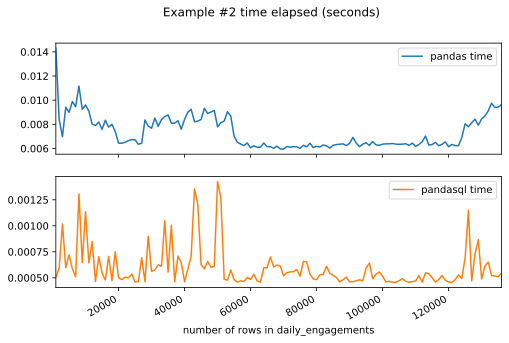

In [50]:
ax = ex2_times_df.plot(title = 'Example #2 time elapsed (seconds)', subplots = True)